In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import h5py
import pyvisa
import time
from scipy.signal import savgol_filter
import scipy.signal as signal
from scipy import interpolate
from scipy.signal import windows
from matplotlib.ticker import MaxNLocator
from scipy.optimize import least_squares
import datetime

In [2]:
factor = 2
SMALL_SIZE = factor*8
MEDIUM_SIZE = factor*10
BIGGER_SIZE = factor*12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Plotting functions

In [8]:
def plot(rn_arr, fname="test.hdf", comment=""):
    # get data from file
    with h5py.File(fname, 'r') as f:
        # determine how many datasets are available
        i_max = 0
        for rn in rn_arr:
            try:
                f[rn]
                i_max += 1
            except KeyError:
                pass
        
        # combine the data from the available datasets
        dset = np.concatenate([np.array(f[rn]) for rn in rn_arr[:i_max]])
        
    t = dset[:,0] - dset[0,0]

    # choose time unit
    if t[-1] > 24*3600:
        t_unit = "days"
        div = 24*3600
    elif t[-1] > 3600:
        t_unit = "h"
        div = 3600
    elif t[-1] > 60:
        t_unit = "min"
        div = 60
    else:
        t_unit = "s"
        div = 1

    # plot the data
    fig, axx = plt.subplots(nrows=2, figsize=(8,6))
    axx[0].plot(t/div, 3*dset[:, 1], label="voltage_monitor")
    axx[0].plot(t/div, 3*dset[:, 3], label="voltage_program")
    axx[0].plot(t/div, 10*dset[:, 4], label="divider_voltage")
    axx[1].plot(t/div, 40*dset[:, 2], label="current_monitor")
#     ax.plot(t/div, dset[:, 5], label="error_voltage")
    
    # plot format
    axx[-1].set_xlabel(f"time [{t_unit}]")
    axx[0].set_ylabel("voltage [kV]")
    axx[1].set_ylabel("current [$\mu$A]")
    date = datetime.datetime.fromtimestamp(dset[0,0])
    axx[0].set_title(f"{comment}{date}")
    for ax in axx:
        ax.legend(loc=(1.05,.2))
        ax.grid()
    plt.tight_layout()

### Testing

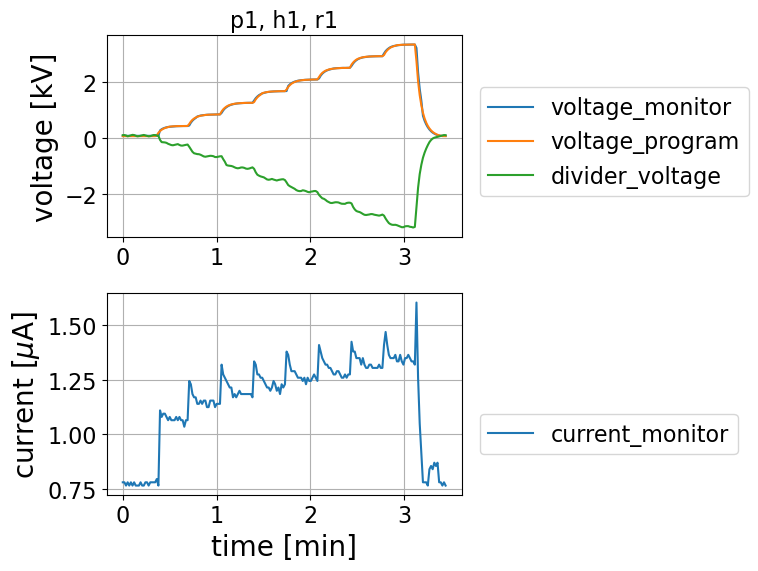

In [56]:
DMM_temp = plot(
    rn_arr  = [f"C-{i}" for i in range(10)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1",
)

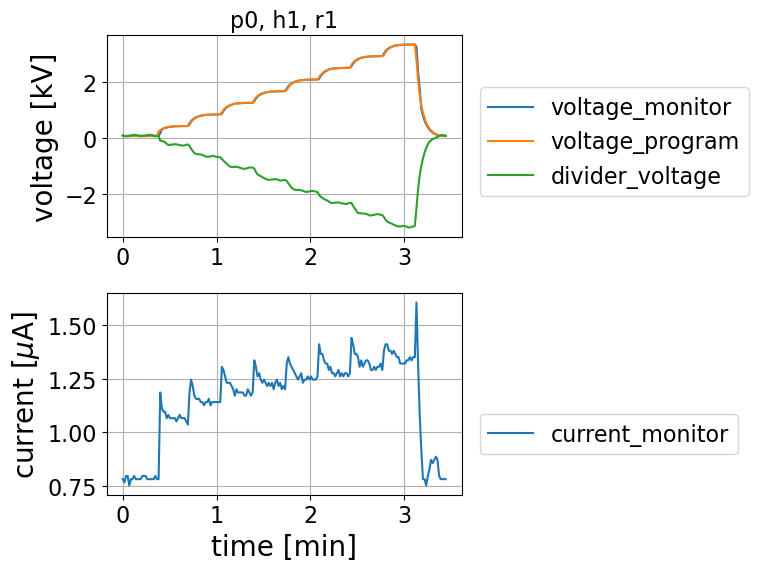

In [57]:
DMM_temp = plot(
    rn_arr  = [f"D-{i}" for i in range(10)],
    fname   = "HV_test.hdf",
    comment = "p0, h1, r1",
)

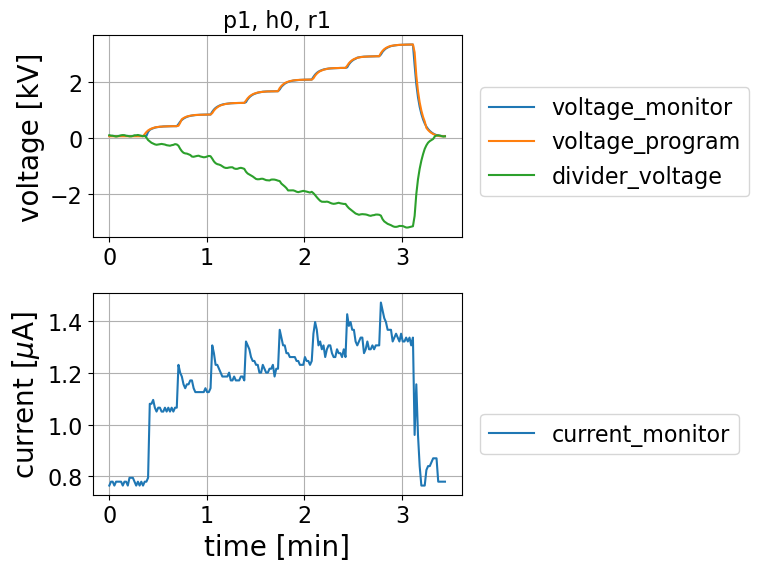

In [58]:
DMM_temp = plot(
    rn_arr  = [f"E-{i}" for i in range(10)],
    fname   = "HV_test.hdf",
    comment = "p1, h0, r1",
)

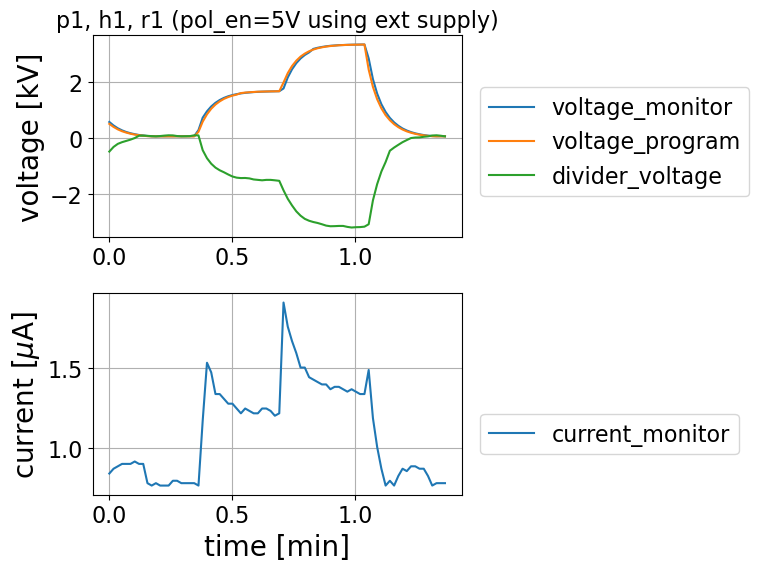

In [61]:
DMM_temp = plot(
    rn_arr  = [f"F-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1 (pol_en=5V using ext supply)",
)

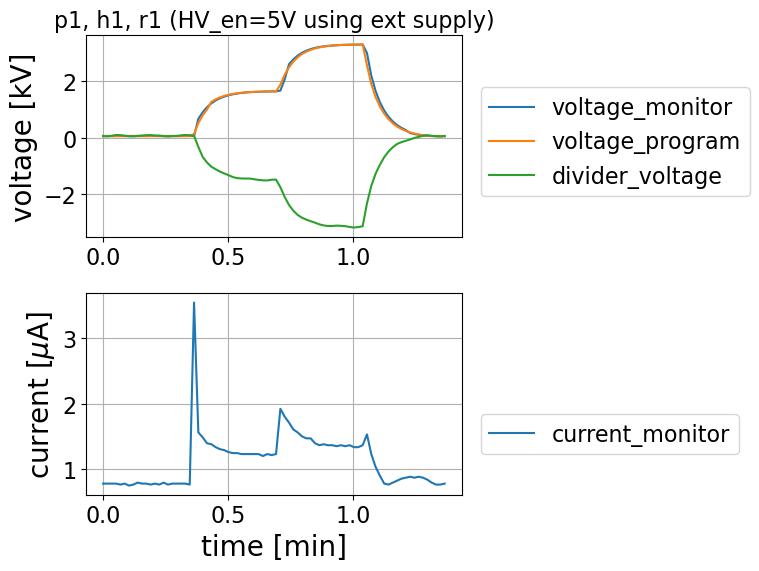

In [62]:
DMM_temp = plot(
    rn_arr  = [f"G-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1 (HV_en=5V using ext supply)",
)

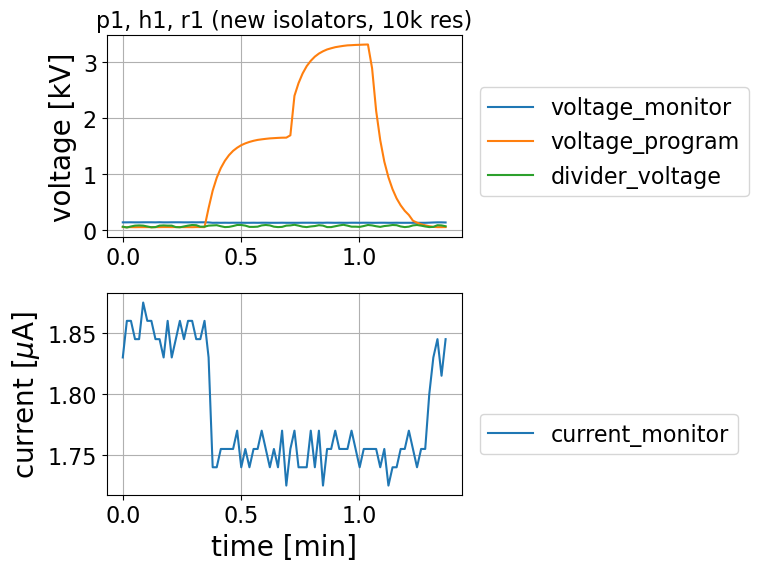

In [4]:
DMM_temp = plot(
    rn_arr  = [f"H-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1 (new isolators, 10k res)",
)

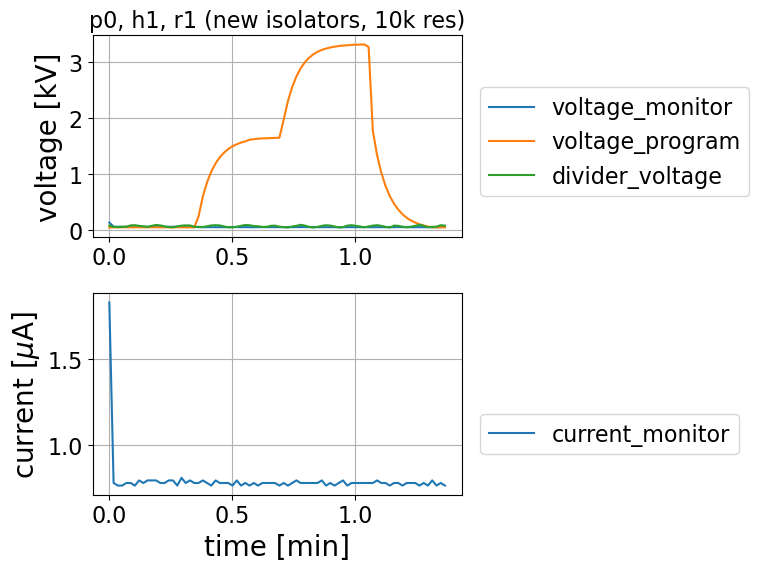

In [5]:
DMM_temp = plot(
    rn_arr  = [f"I-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p0, h1, r1 (new isolators, 10k res)",
)

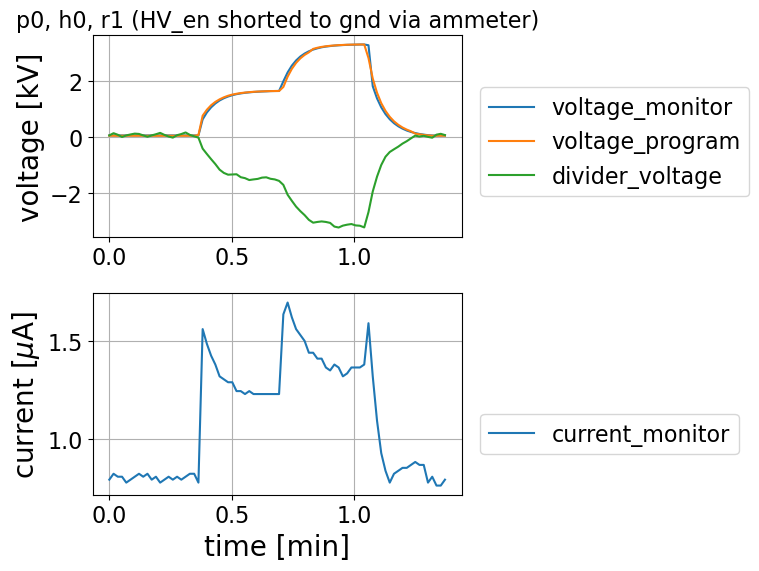

In [6]:
DMM_temp = plot(
    rn_arr  = [f"J-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p0, h0, r1 (HV_en shorted to gnd via ammeter)",
)

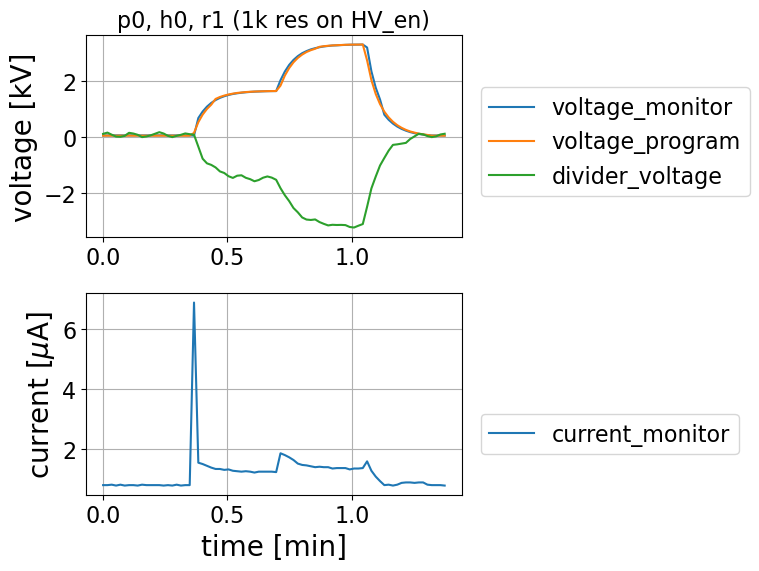

In [7]:
DMM_temp = plot(
    rn_arr  = [f"K-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p0, h0, r1 (1k res on HV_en)",
)

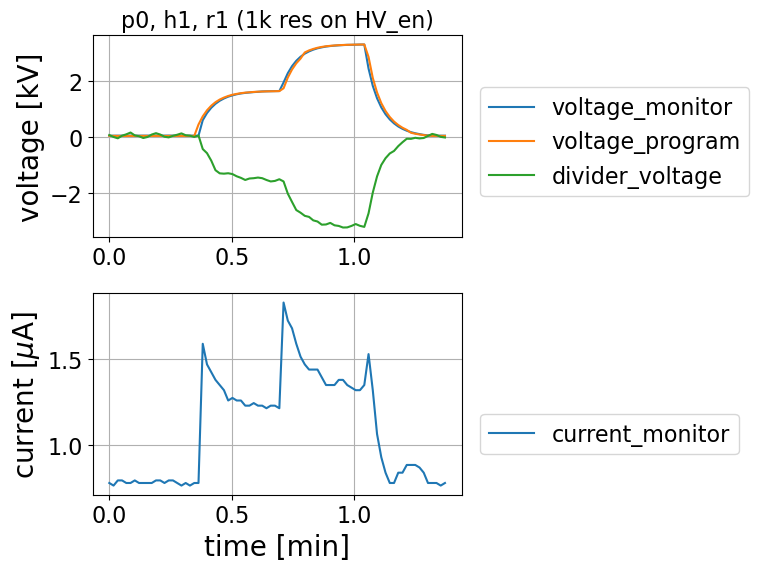

In [8]:
DMM_temp = plot(
    rn_arr  = [f"L-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p0, h1, r1 (1k res on HV_en)",
)

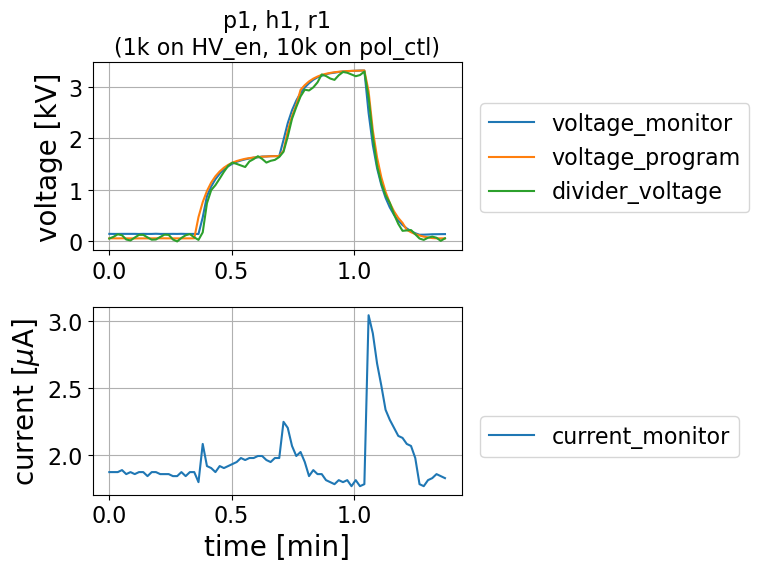

In [11]:
DMM_temp = plot(
    rn_arr  = [f"M-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1\n(1k on HV_en, 10k on pol_ctl)",
)

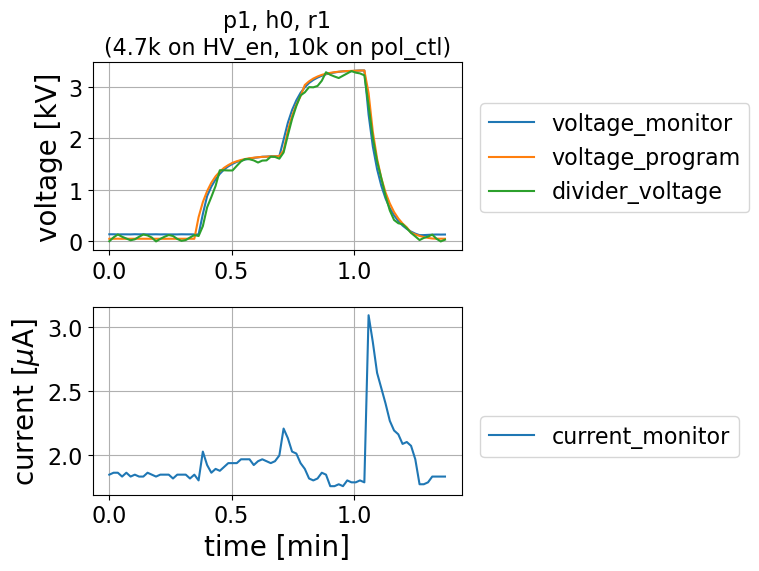

In [12]:
DMM_temp = plot(
    rn_arr  = [f"N-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h0, r1\n(4.7k on HV_en, 10k on pol_ctl)",
)

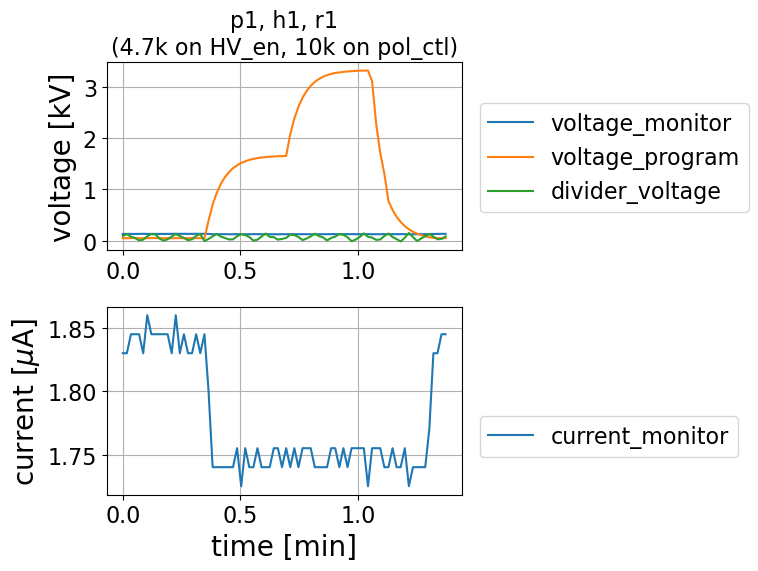

In [13]:
DMM_temp = plot(
    rn_arr  = [f"O-{i}" for i in range(4)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1\n(4.7k on HV_en, 10k on pol_ctl)",
)

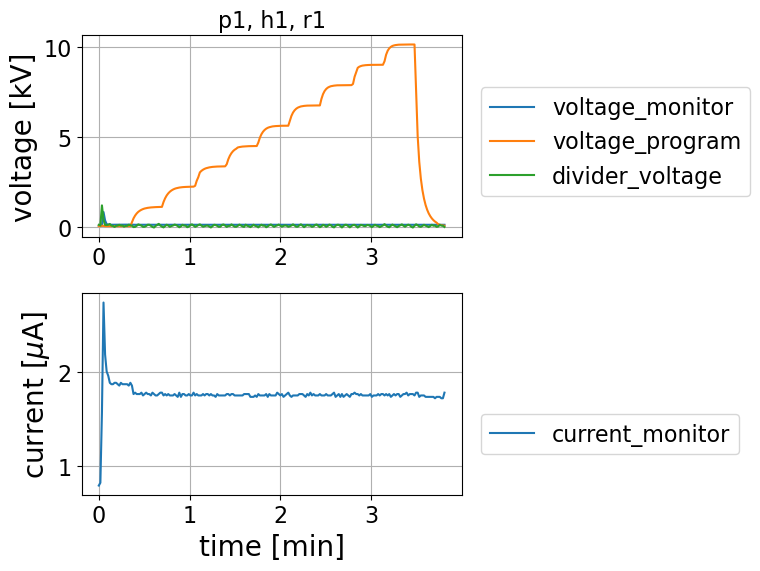

In [21]:
DMM_temp = plot(
    rn_arr  = [f"P-{i}" for i in range(11)],
    fname   = "HV_test.hdf",
    comment = "p1, h1, r1",
)

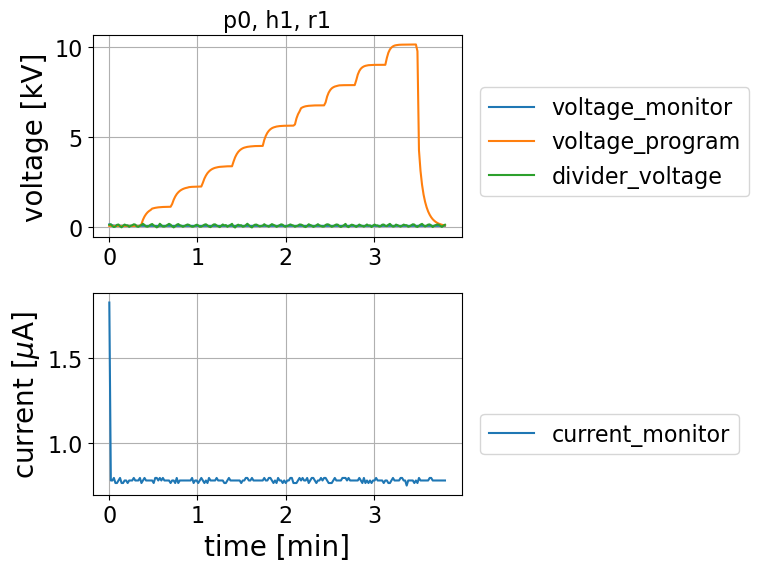

In [22]:
DMM_temp = plot(
    rn_arr  = [f"Q-{i}" for i in range(11)],
    fname   = "HV_test.hdf",
    comment = "p0, h1, r1",
)

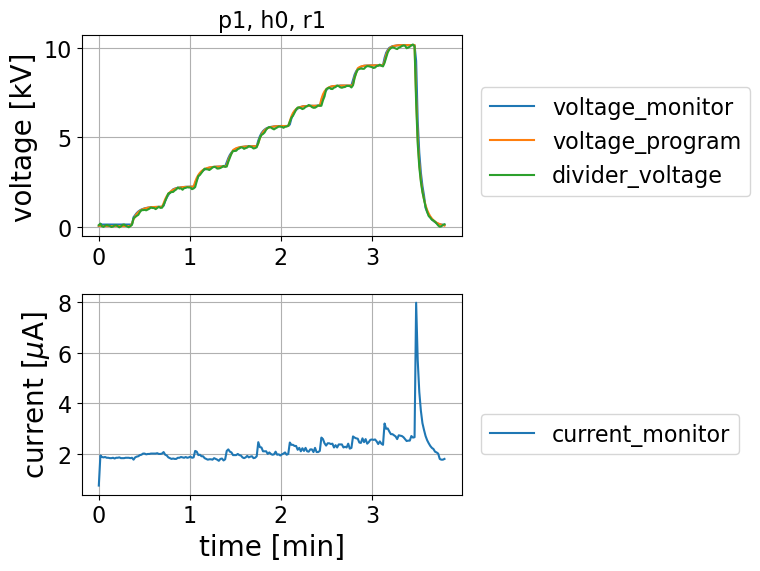

In [23]:
DMM_temp = plot(
    rn_arr  = [f"R-{i}" for i in range(11)],
    fname   = "HV_test.hdf",
    comment = "p1, h0, r1",
)

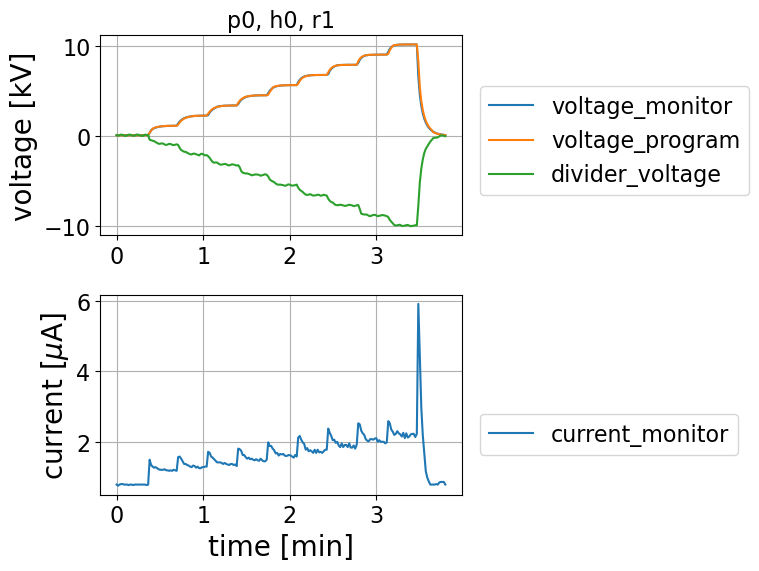

In [20]:
DMM_temp = plot(
    rn_arr  = [f"S-{i}" for i in range(11)],
    fname   = "HV_test.hdf",
    comment = "p0, h0, r1",
)

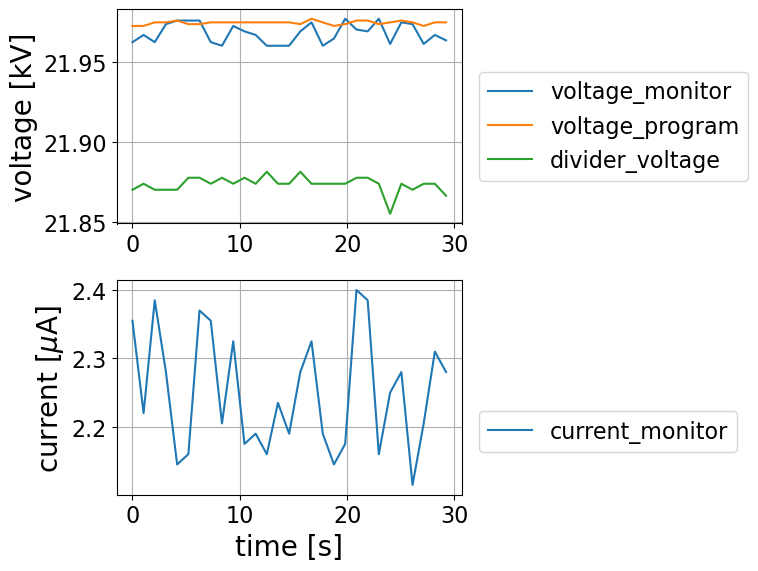

In [5]:
plot(
    rn_arr  = [f"A-{i}" for i in range(1,2)],
    fname   = "closed_box_9may23.hdf",
    comment = "",
)

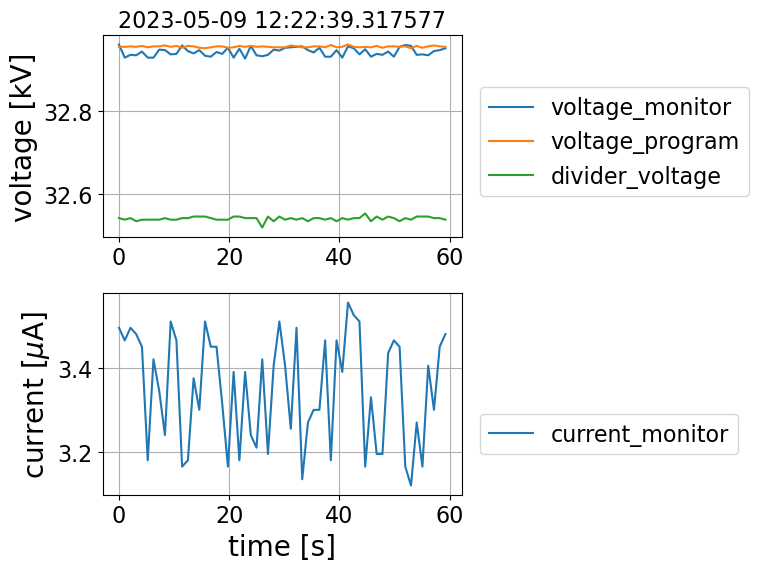

In [14]:
plot(
    rn_arr  = [f"B-{i}" for i in range(1)],
    fname   = "closed_box_9may23.hdf",
    comment = "",
)

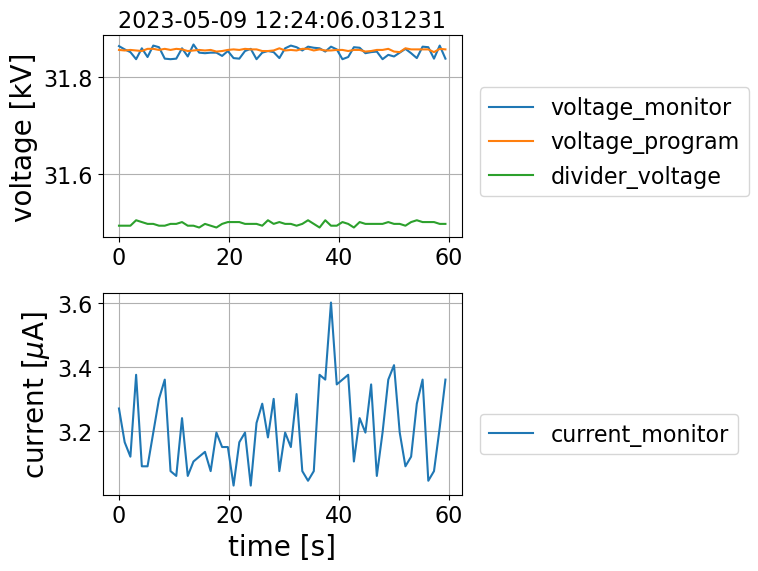

In [17]:
plot(
    rn_arr  = [f"C-{i}" for i in range(1)],
    fname   = "closed_box_9may23.hdf",
    comment = "",
)

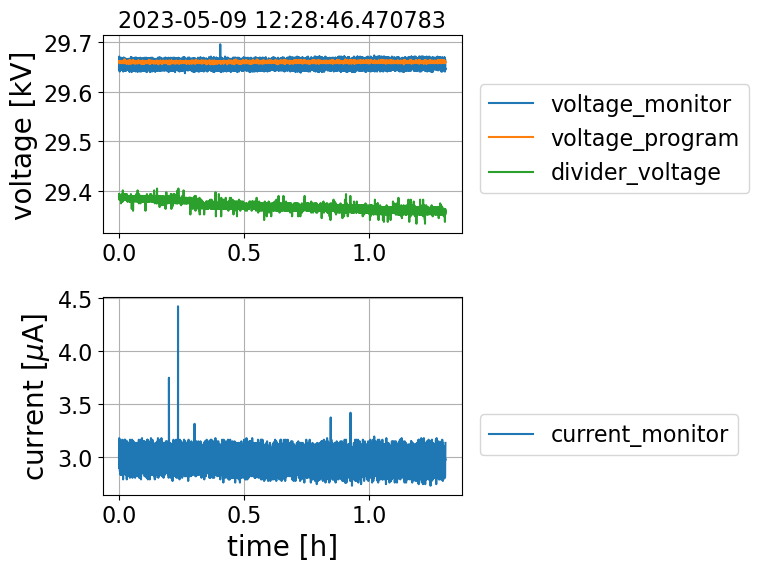

In [32]:
plot(
    rn_arr  = [f"D-{i}" for i in range(999)],
    fname   = "closed_box_9may23.hdf",
    comment = "",
)

### The negative box

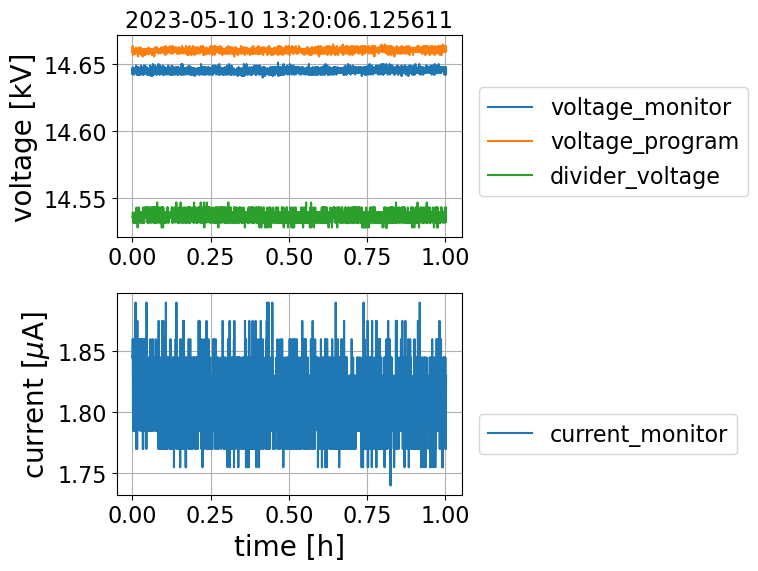

In [19]:
plot(
    rn_arr  = [f"A-{i}" for i in range(999)],
    fname   = "negative_10may23.hdf",
    comment = "",
)